# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [75]:
from sklearn import metrics

## Regression Model Evaluation

In [76]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [77]:
data.shape

(506, 14)

In [78]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [79]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [82]:
X_train.shape

(404, 13)

In [83]:
y_train.shape

(404, 1)

In [84]:
X_test.shape

(102, 13)

In [85]:
y_test.shape

(102, 1)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
lr.score(X_train, y_train)

0.7508856358979673

In [90]:
flat_list_X_train = [item for sublist in lr.predict(X_train) for item in sublist]

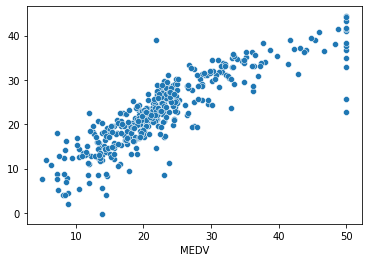

In [91]:
sns.scatterplot(x=y_train['MEDV'], y=flat_list_X_train)

In [92]:
flat_list_X_test = [item for sublist in lr.predict(X_test) for item in sublist]

In [93]:
lr.score(X_test, y_test)

0.6687594935356307

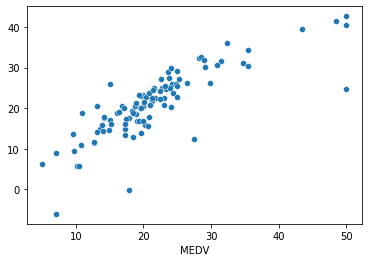

In [94]:
sns.scatterplot(x=y_test['MEDV'], y=flat_list_X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [95]:
print("R2_train: ", metrics.r2_score(y_train, lr.predict(X_train)))
print("R2_test: ", metrics.r2_score(y_test, lr.predict(X_test)))

R2_train:  0.7508856358979673
R2_test:  0.6687594935356307


## 4. Calculate and print mean squared error for both the training and the testing set.

In [96]:
print("MSE_train: ", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("MSE_test: ", metrics.mean_squared_error(y_test, lr.predict(X_test)))

MSE_train:  21.641412753226312
MSE_test:  24.291119474973616


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [97]:
print("MAE_train: ", metrics.mean_absolute_error(y_train, lr.predict(X_train)))
print("MAE_test: ", metrics.mean_absolute_error(y_test, lr.predict(X_test)))

MAE_train:  3.314771626783225
MAE_test:  3.1890919658878523


## Classification Model Evaluation

In [98]:
from sklearn.datasets import load_iris

data = load_iris()

X1 = pd.DataFrame(data["data"], columns=data["feature_names"])
y1 = pd.DataFrame(data["target"], columns=["class"])

data1 = pd.concat([X1, y1], axis=1)

In [99]:
data1.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [100]:
data1.shape

(150, 5)

In [101]:
data1.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int64
dtype: object

In [102]:
data1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [256]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state=42)

In [257]:
X_train1.shape

(120, 4)

In [258]:
y_train1.shape

(120, 1)

In [259]:
X_test1.shape

(30, 4)

In [260]:
y_test1.shape

(30, 1)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [261]:
lr = LinearRegression()

In [262]:
lr.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
lr.score(X_train1, y_train1)

0.9254199044989623

In [264]:
flat_list_X_train1 = [item for sublist in lr.predict(X_train1) for item in sublist]

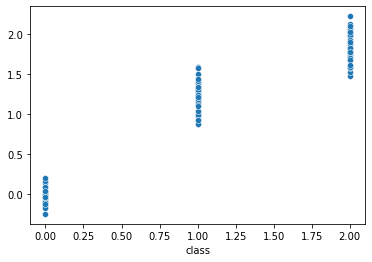

In [265]:
sns.scatterplot(x=y_train1['class'], y=flat_list_X_train1)

In [266]:
flat_list_X_test1 = [item for sublist in lr.predict(X_test1) for item in sublist]

In [267]:
lr.score(X_test1, y_test1)

0.9468960016420045

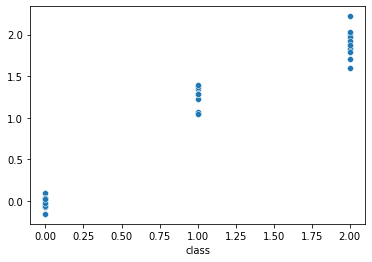

In [268]:
sns.scatterplot(x=y_test1['class'], y=flat_list_X_test1)

LogisticRegression

Many predictors

In [269]:
from sklearn.linear_model import LogisticRegression

In [270]:
log = LogisticRegression(max_iter=10000)

In [271]:
log = LogisticRegression()

In [272]:
log.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [273]:
log.score(X_train1, y_train1)

0.975

In [274]:
log.score(X_test1, y_test1)

1.0

In [276]:
y_predict_train1 = log.predict(X_train1)

In [277]:
y_predict_test1 = log.predict(X_test1)

In [278]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, balanced_accuracy_score

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [309]:
print("accuracy_train1: ", accuracy_score(y_train1, y_predict_train1))
print("accuracy_test1: ", accuracy_score(y_test1, y_predict_test1))

accuracy_train1:  0.975
accuracy_test1:  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [310]:
print("balanced_accuracy_train1: ", balanced_accuracy_score(y_train1, y_predict_train1))
print("balanced_accuracy_test1: ", balanced_accuracy_score(y_test1, y_predict_test1))

balanced_accuracy_train1:  0.975609756097561
balanced_accuracy_test1:  1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [311]:
print("precision_score_train1:", precision_score(y_train1, y_predict_train1, average='weighted'))
print("precision_score_test1:", precision_score(y_test1, y_predict_test1, average='weighted'))

precision_score_train1: 0.9767857142857144
precision_score_test1: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [312]:
print("recall_score_train1:", recall_score(y_train1, y_predict_train1, average='weighted'))
print("recall_score_test1:", recall_score(y_test1, y_predict_test1, average='weighted'))

recall_score_train1: 0.975
recall_score_test1: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [313]:
print("f1_score_train1:", f1_score(y_train1, y_predict_train1, average='weighted'))
print("f1_score_test1:", f1_score(y_test1, y_predict_test1, average='weighted'))

f1_score_train1: 0.9749882794186592
f1_score_test1: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [284]:
pd.crosstab(y_train1['class'], y_predict_train1)

col_0,0,1,2
class,,,
0,40,0,0
1,0,38,3
2,0,0,39


In [285]:
pd.crosstab(y_test1['class'], y_predict_test1)

col_0,0,1,2
class,,,
0,10,0,0
1,0,9,0
2,0,0,11


In [286]:
from sklearn.metrics import confusion_matrix

In [287]:
confusion_matrix(y_train1['class'], y_predict_train1)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]])

In [288]:
confusion_matrix(y_test1['class'], y_predict_test1)
    

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

data = load_boston()

In [295]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [298]:
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor()
}

In [299]:
for name, model in models.items():
    print(f"Training ---> {name}")
    model.fit(X_train,y_train)
    print(f"OK")

Training ---> ridge
OK
Training ---> lasso
OK
Training ---> sgd
OK
Training ---> knn
OK
Training ---> gradient
OK


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [300]:
for name, model in models.items():
    y_pred  = model.predict(X_test)
    print(f"--------{name}--------")
    print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2: ", metrics.r2_score(y_test,y_pred))
    print("\n")

--------ridge--------
MAE:  3.132947427805528
MSE:  24.47719122770867
RMSE:  4.947442897872462
R2:  0.666222167016852


--------lasso--------
MAE:  3.2535397673681614
MSE:  24.4094897612997
RMSE:  4.94059609372186
R2:  0.6671453631686304


--------sgd--------
MAE:  192735849422216.1
MSE:  3.8352733896943623e+28
RMSE:  195838540376871.75
R2:  -5.2298861785292793e+26


--------knn--------
MAE:  3.6639215686274507
MSE:  25.860125490196076
RMSE:  5.0852851926117255
R2:  0.6473640882039258


--------gradient--------
MAE:  1.9414852365816193
MSE:  6.362075558205119
RMSE:  2.5223155151973193
R2:  0.9132449563621136




data = load_iris()

In [301]:
for name, model in models.items():
    print(f"Training ---> {name}")
    model.fit(X_train1, y_train1)
    print(f"OK")

Training ---> ridge
OK
Training ---> lasso
OK
Training ---> sgd
OK
Training ---> knn
OK
Training ---> gradient
OK


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [302]:
for name, model in models.items():
    y_pred  = model.predict(X_test1)
    print(f"--------{name}--------")
    print("MAE: ", metrics.mean_absolute_error(y_test1, y_pred))
    print("MSE: ", metrics.mean_squared_error(y_test1,y_pred))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test1,y_pred)))
    print("R2: ", metrics.r2_score(y_test1,y_pred))
    print("\n")

--------ridge--------
MAE:  0.15011180138465444
MSE:  0.03909724311678355
RMSE:  0.19773022813111696
R2:  0.9440579987200235


--------lasso--------
MAE:  0.5573916938199889
MSE:  0.4165586042271026
RMSE:  0.6454135141342352
R2:  0.40397020062894695


--------sgd--------
MAE:  0.1731921925680648
MSE:  0.053273841107144664
RMSE:  0.23081126728811283
R2:  0.9237735182886642


--------knn--------
MAE:  0.02666666666666666
MSE:  0.007999999999999997
RMSE:  0.08944271909999157
R2:  0.9885532591414944


--------gradient--------
MAE:  0.031072224606947096
MSE:  0.004361303030818043
RMSE:  0.06604016225614563
R2:  0.9937596618001013


